# BUSINESS ANALYTICS MODEL
This project is to develop a business analytics model for Walmart Supply Chain Optimization. The dataset used for this is 
sourced from Kaggle, 'Walmart.csv'. Below are the steps that will be followed to execute it.
                                                                                                        
Step 1: Review and clean your data to make it ready for analysis.
Step 2: Create a new Jupyter Notebook for the model development task.
Step 3: Develop a clear and logical step-by-step plan for implementing the model.
Step 4: Build and train the business analytics model using the data.
Step 5: Evaluate the model's performance using relevant metrics.

TECHNIQUES USED:
-Data Analytics Techniques.
-Model Development Process
-Evaluation Methods

STEP 1: Load the 'Walmart.csv' dataset.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Walmart.csv')

# Display the first few rows of the dataset
print(df.head())

   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


STEP 2: Convert the Date Column to Datetime Format and Check for Missing values

In [2]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


STEP 3: Exploratory Data Analysis (EDA)
Plotting the Distribution of Weekly Sales

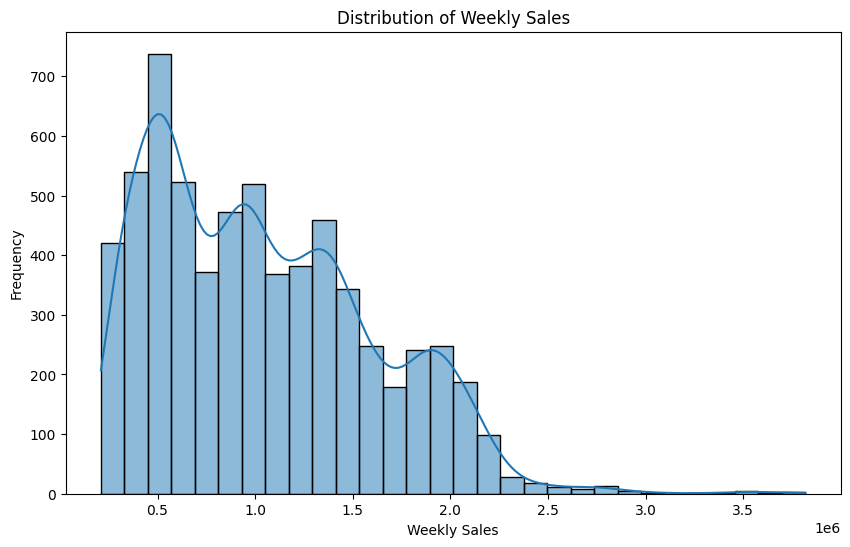

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of Weekly Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], bins=30, kde=True)
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

Ploting the Trend of Weekly Sales Over Time

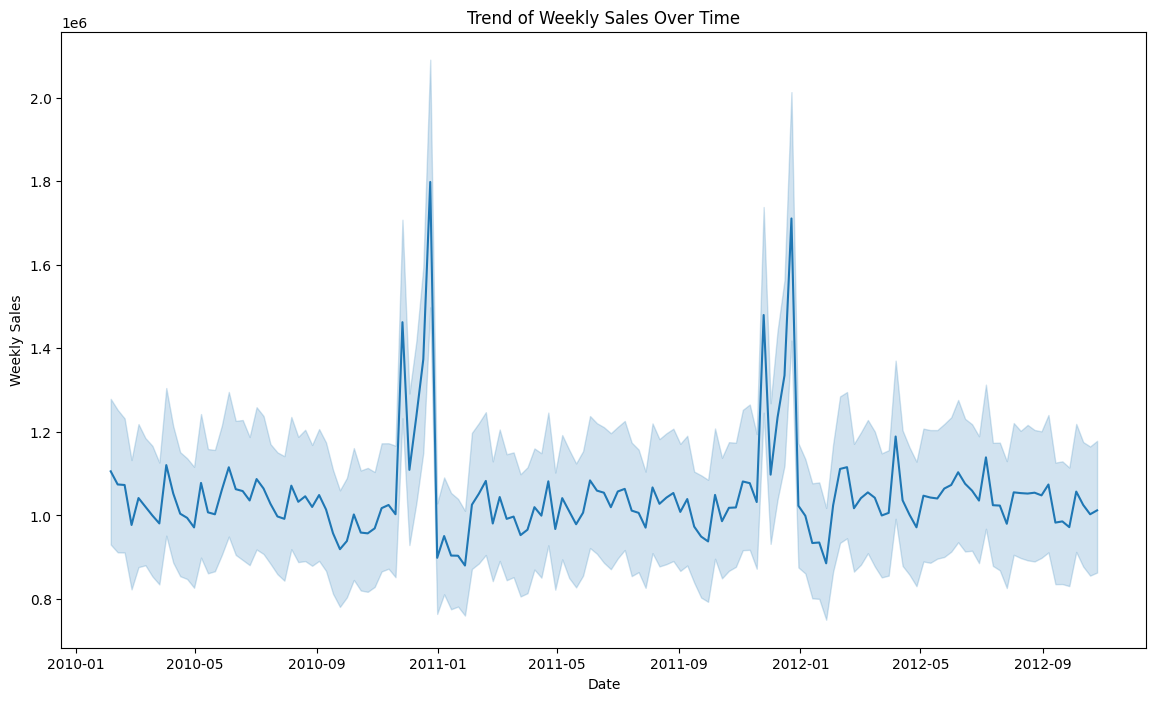

In [4]:
# Plotting the trend of Weekly Sales over time
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Weekly_Sales', data=df)
plt.title('Trend of Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

Plotting the Correlation Heatmap

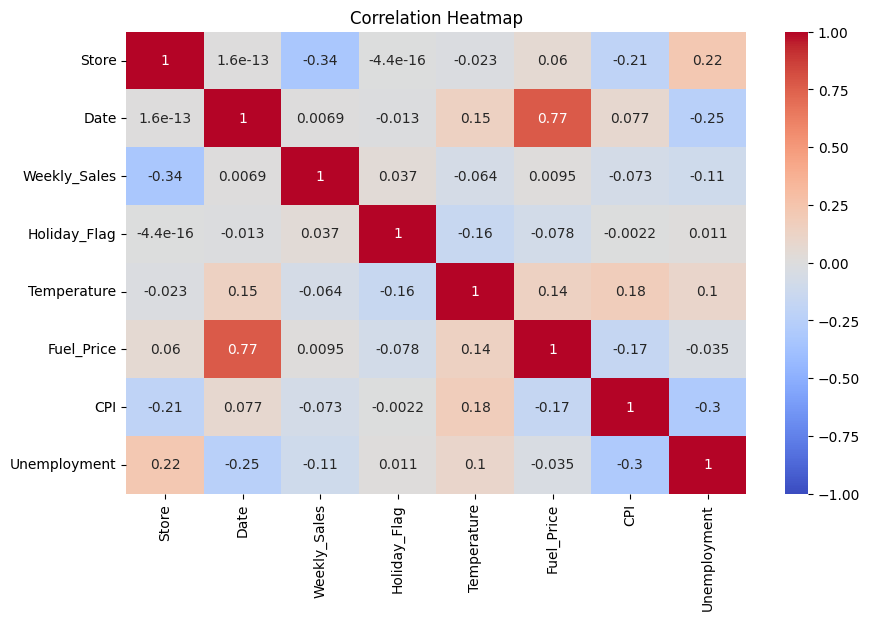

In [5]:
# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

STEP 4: Feature Engineering

In [6]:
# Creating new features: Year, Month, Day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

STEP 5: Model Development
Selecting Features and Target Variable

In [7]:
# Selecting features and target variable
X = df[['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day']]
y = df['Weekly_Sales']

Spliting the Data into Training and Testing Sets

In [8]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initializing and Training the Linear Regression Model

In [9]:
from sklearn.linear_model import LinearRegression

# Initializing and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

STEP 6: Model Evaluation
Making Predictions on the Test Set

In [10]:
# Making predictions on the test set
y_pred = model.predict(X_test)

Evaluating the Model's Performance

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 272064071370.04953
R-squared: 0.1554859026152028


Ploting the Actual vs Predicted Values

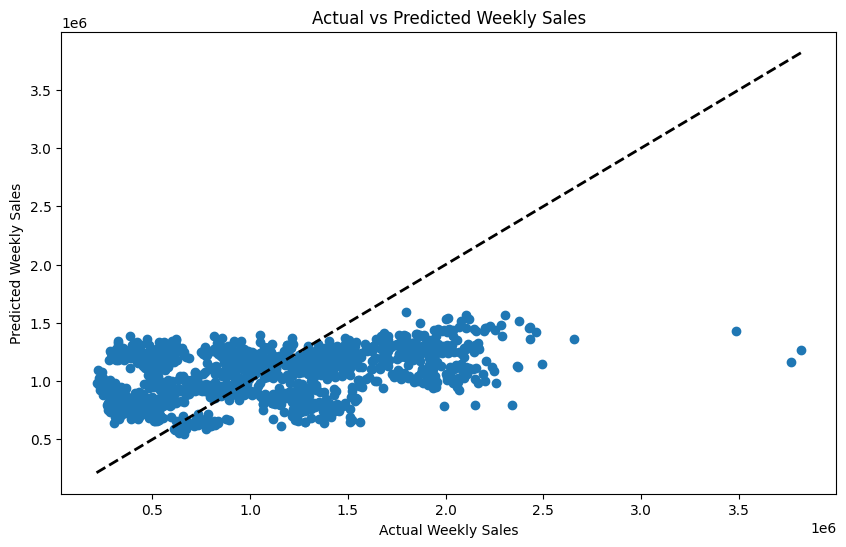

In [12]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Weekly Sales')
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.show()

The linear regression model did not perform well, looking at the plot. this is because 
MSE is high and R-squared is low which struggle to predict weely_sales based on the given features accurately.

The Decision Tree model will be used and we will evaluate its performance using the same metrics in comparison to the linear regression model.

In [13]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluating the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 20512340934.12049
R-squared: 0.9363276414927053


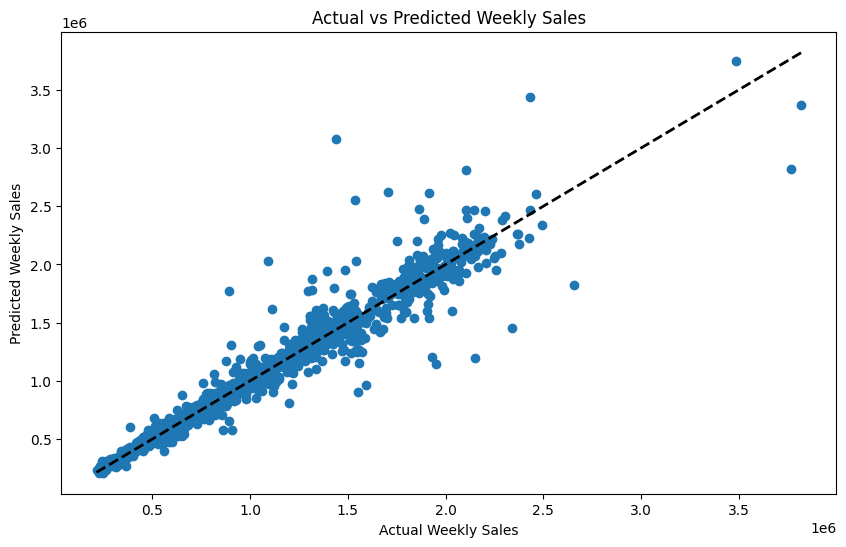

In [16]:
# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Actual vs Predicted Weekly Sales')
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
plt.show()

Looking at the plot for actual and predicted values for the decision tree model it shows a strong correlation between them indicated by the high level of R-squared.